# Import the Necessary Libraries 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve,precision_recall_curve,auc


# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

**Reading data**

In [2]:
df = pd.read_csv("..\Heart-Attack-Prediction\heart.csv")

Dataset Attributes

1. **Age:** The age of the patient in years.
2. **Sex:** The gender of the patient.  
   - `M`: Male  
   - `F`: Female  
3. **ChestPainType:** Type of chest pain the patient experienced.  
   - `TA`: Typical Angina (chest pain due to reduced blood flow)  
   - `ATA`: Atypical Angina (less common, more vague symptoms)  
   - `NAP`: Non-Anginal Pain (pain not related to heart issues)  
   - `ASY`: Asymptomatic (no chest pain)  
4. **RestingBP:** The patient’s resting blood pressure in mm Hg.
5. **Cholesterol:** The patient’s serum cholesterol level in mg/dl.
6. **FastingBS:** Fasting blood sugar level.  
   - `1`: Fasting blood sugar > 120 mg/dl  
   - `0`: Fasting blood sugar ≤ 120 mg/dl  
7. **RestingECG:** Results of the patient's resting electrocardiogram.  
   - `Normal`: Normal ECG  
   - `ST`: ST-T wave abnormality (e.g., T-wave inversions or ST elevation/depression)  
   - `LVH`: Left ventricular hypertrophy (thickening of the heart muscle)  
8. **MaxHR:** Maximum heart rate achieved by the patient during exercise (numeric value between 60 and 202).
9. **ExerciseAngina:** Whether the patient experienced exercise-induced chest pain.  
   - `Y`: Yes  
   - `N`: No  
10. **Oldpeak:** Depression in the ST segment during exercise (numeric value).
11. **ST_Slope:** The slope of the ST segment during peak exercise.  
   - `Up`: Upsloping  
   - `Flat`: Flat  
   - `Down`: Downsloping  
12. **HeartDisease:** Target variable indicating whether the patient has heart disease.  
   - `1`: Heart disease present  
   - `0`: No heart disease  

---

This dataset is useful for predicting whether a patient has heart disease based on these factors.



In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [5]:
df.shape

(918, 12)

In [6]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


- No null values present in the data

In [10]:
df.describe(include='object').T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


# Exploratary Data Analysis             
Exploratory data analysis (EDA) is a process of summarizing and visualizing data to understand


<Axes: xlabel='Age', ylabel='Count'>

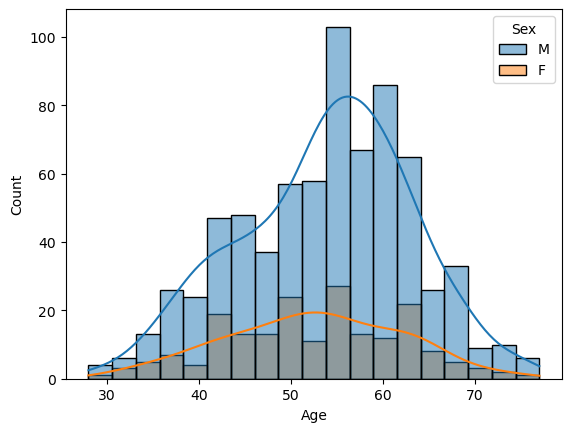

In [11]:
#histograms to visualize the distribution of numerical features
sns.histplot(x='Age', data=df, kde=True, hue='Sex')

<Axes: xlabel='Cholesterol', ylabel='Count'>

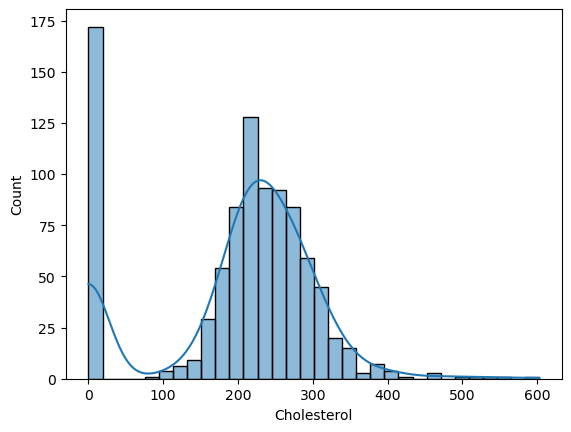

In [12]:
sns.histplot(x='Cholesterol', data=df, kde=True)

<Axes: xlabel='Cholesterol', ylabel='Count'>

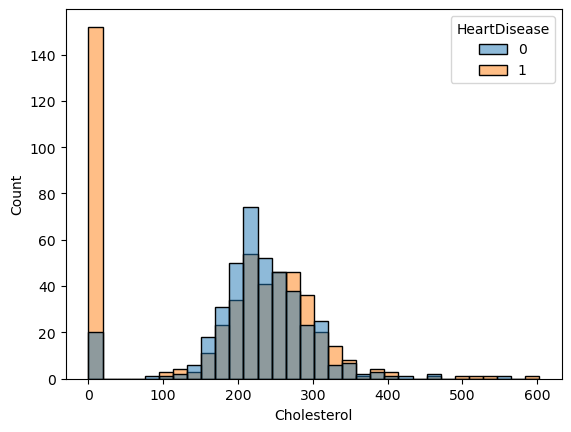

In [13]:
sns.histplot(x='Cholesterol', data=df, hue='HeartDisease')

<Axes: xlabel='Cholesterol', ylabel='Age'>

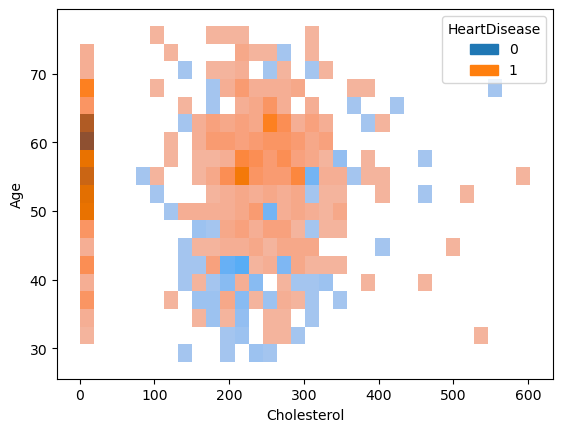

In [14]:
sns.histplot(x='Cholesterol', y='Age', data=df, hue='HeartDisease',color='viridis')

<Axes: xlabel='RestingECG', ylabel='Count'>

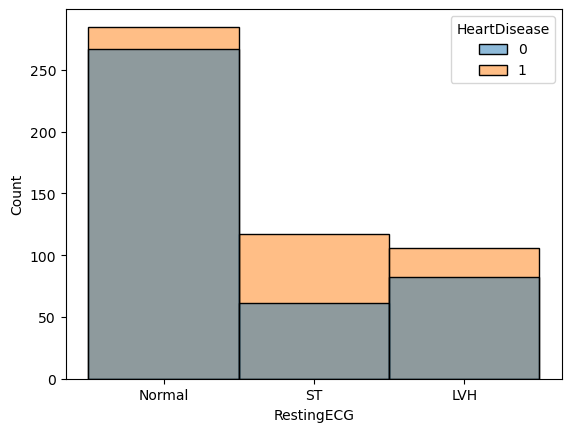

In [15]:
sns.histplot(x='RestingECG', data=df, hue='HeartDisease',color='viridis')

<Figure size 1500x1000 with 0 Axes>

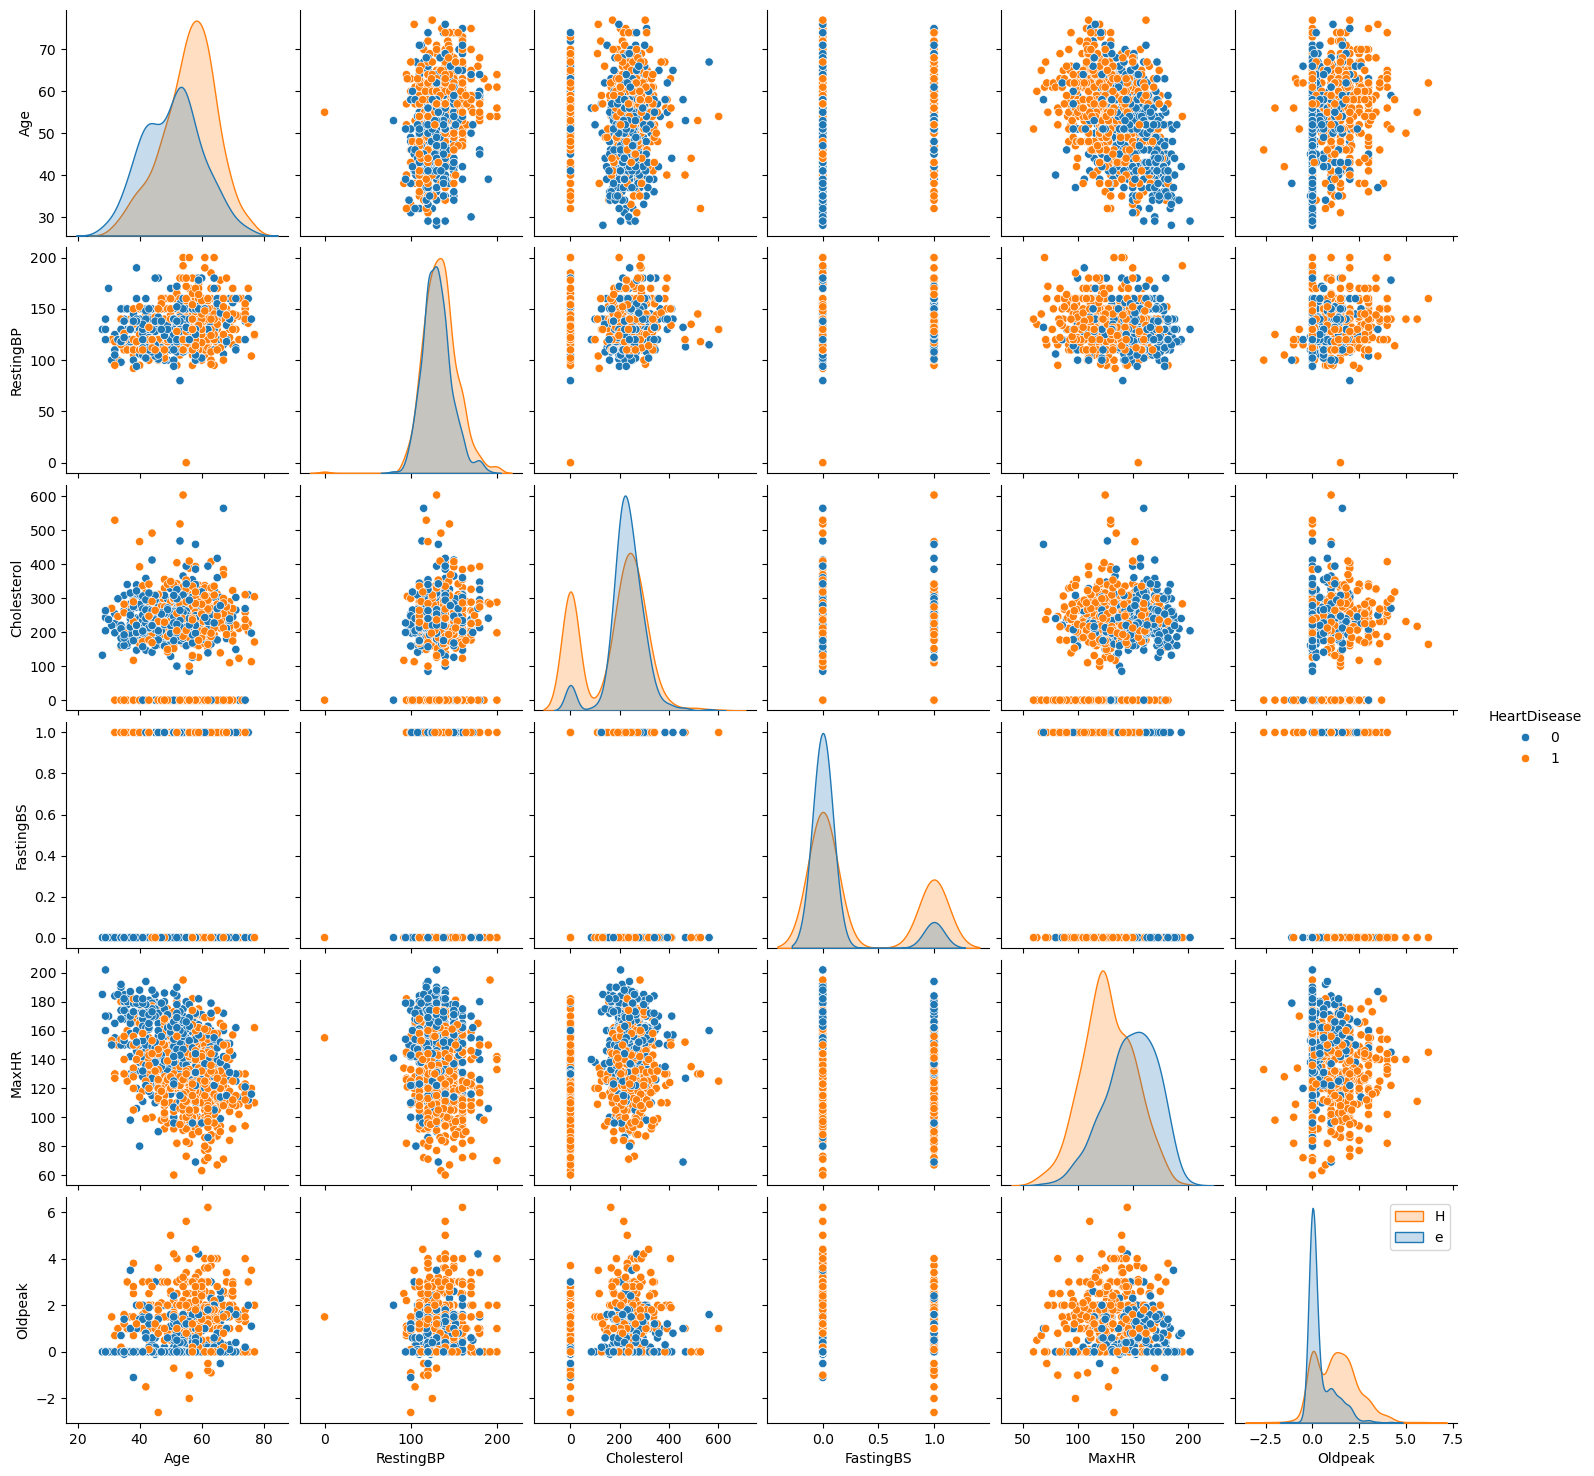

In [16]:
# Pair plot: It shows the relationship between numerical features and also shows the distribution and relationship of each numerical columns between each combination.
plt.figure(figsize=(15,10))
sns.pairplot(df, hue='HeartDisease')
plt.legend('HeartDisease')
plt.show()

<Figure size 1500x1000 with 0 Axes>

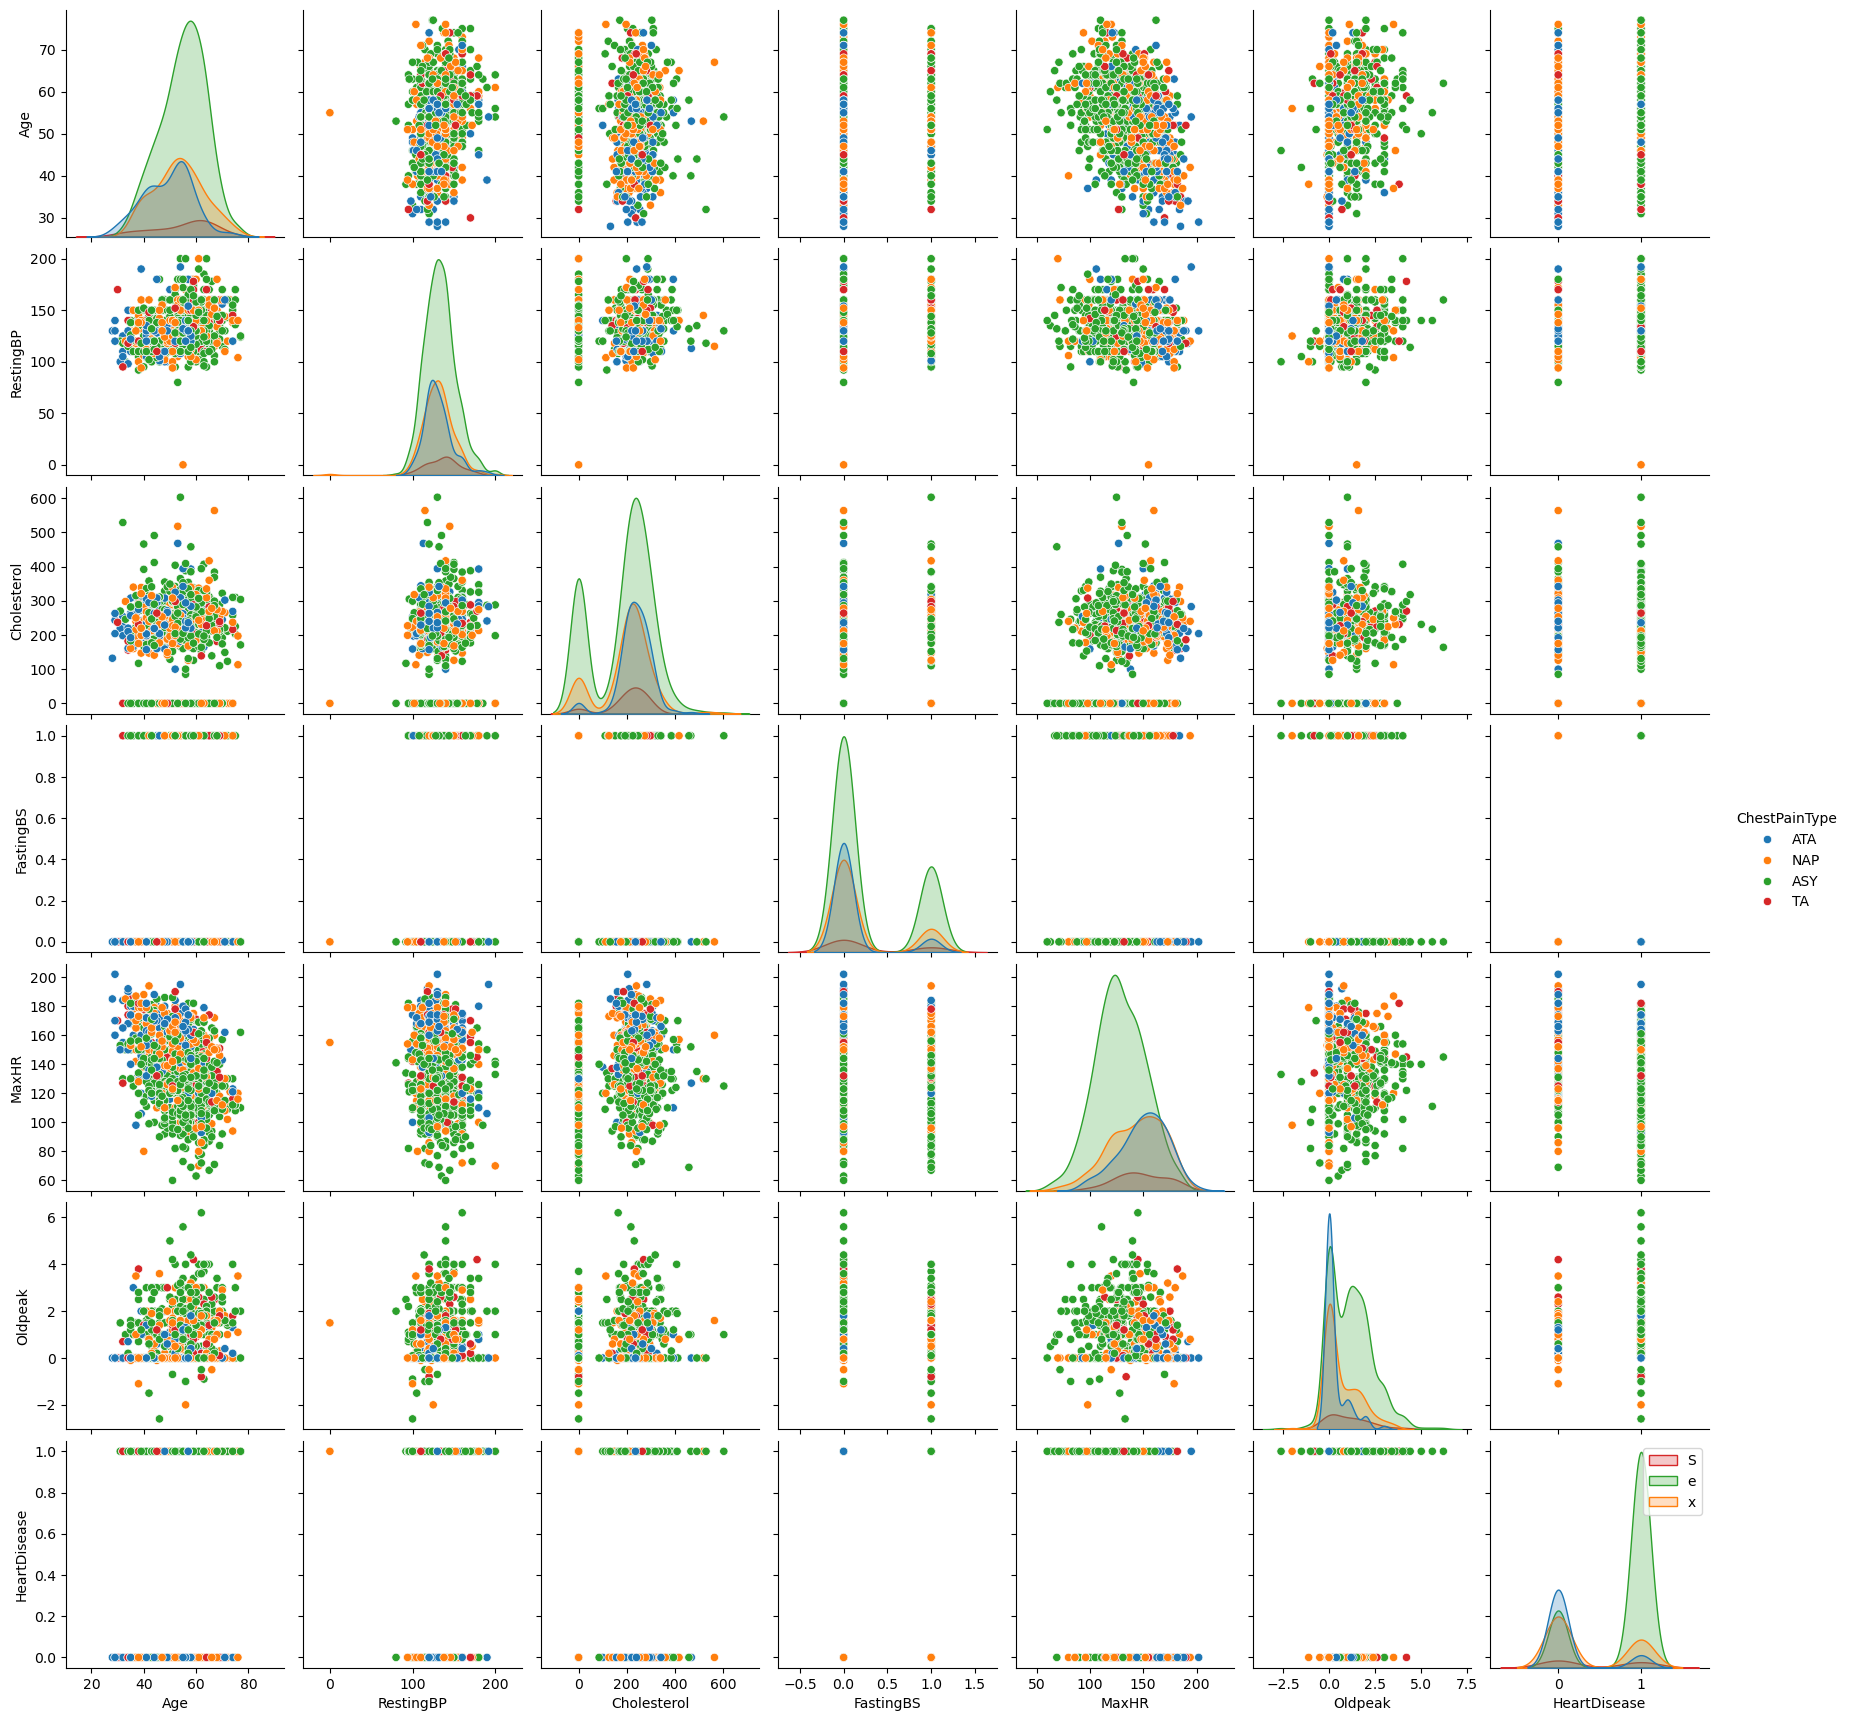

In [17]:
plt.figure(figsize=(15,10))
sns.pairplot(df, hue='ChestPainType')
plt.legend('Sex')
plt.show()

**Value Count**

In [18]:
# value counts to get a count per category
df['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [19]:
df['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [20]:
df['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [21]:
df['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [22]:
# Unique method: to get the unique values in a column 
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [23]:
# nunique method: to get the number of unique values in a column
df['ST_Slope'].nunique()

3

**Count plot**

In [24]:
# categorical labels to plot countplot
df['ChestPainType']=df['ChestPainType'].replace({'ASY':'Asymptomatic','NAP':'Non-Anginal Pain','ATA':'Atypical Angina','TA':'Typical Angina'})

In [25]:
df['ChestPainType'].value_counts()

ChestPainType
Asymptomatic        496
Non-Anginal Pain    203
Atypical Angina     173
Typical Angina       46
Name: count, dtype: int64

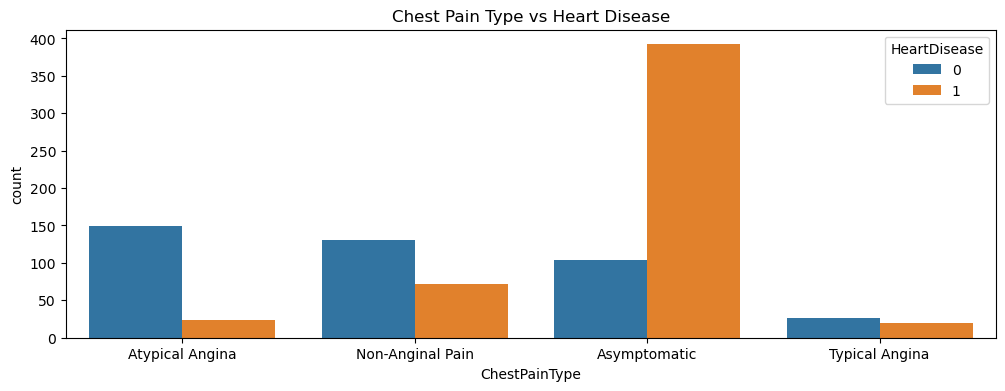

In [26]:
# countplot to visualize the distribution of categorical features
plt.figure(figsize=(12,4),dpi=100)
sns.countplot(x='ChestPainType', data=df, hue='HeartDisease')
plt.title('Chest Pain Type vs Heart Disease')
plt.show()

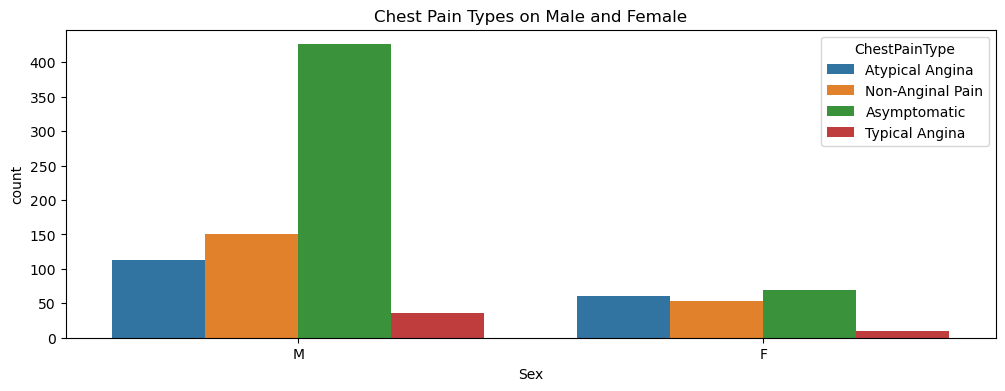

In [27]:
plt.figure(figsize=(12,4),dpi=100)
sns.countplot(x='Sex', data = df, hue='ChestPainType')
plt.title('Chest Pain Types on Male and Female')
plt.show()

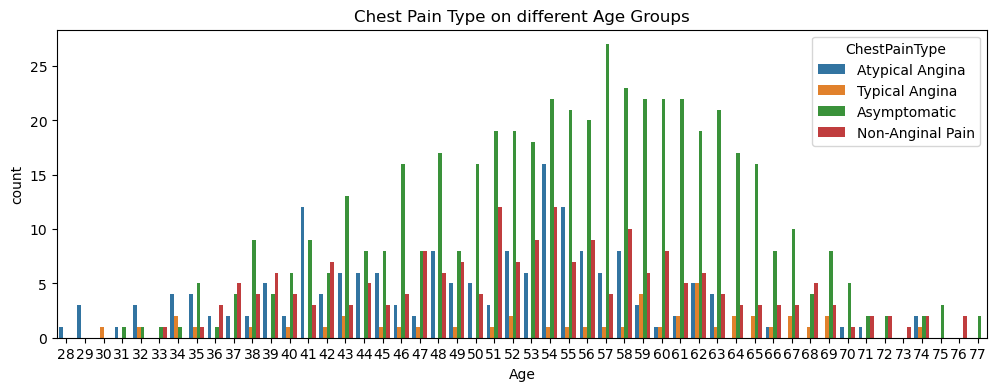

In [28]:
plt.figure(figsize=(12,4),dpi=100)
sns.countplot(x='Age', data=df, hue='ChestPainType')
plt.title('Chest Pain Type on different Age Groups')
plt.show()

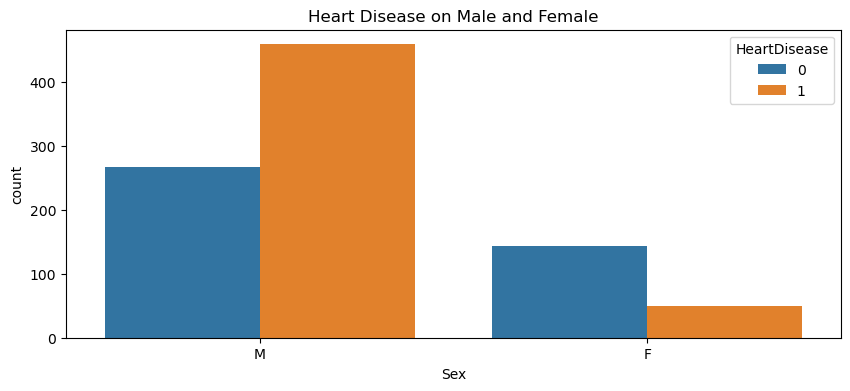

In [29]:
plt.figure(figsize=(10,4),dpi=100)
sns.countplot(x='Sex', data=df, hue='HeartDisease')
plt.title('Heart Disease on Male and Female')
plt.show()

**Boxplot**

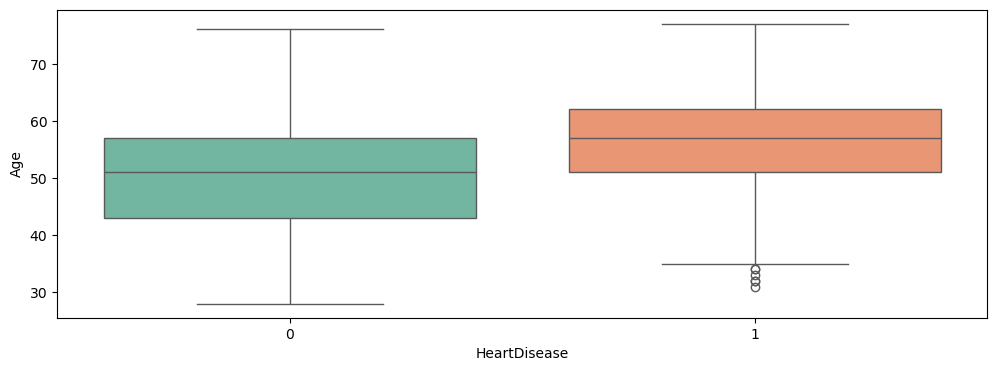

In [30]:
#boxplot to visualize numerical features
plt.figure(figsize=(12,4))
sns.boxplot(x='HeartDisease', y='Age', data=df, palette='Set2')
plt.show()

**Correlation Method**

In [31]:
#correlation method to find the relationship between numerical features
df.corr(numeric_only=True)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


*Correlation Heatmap*

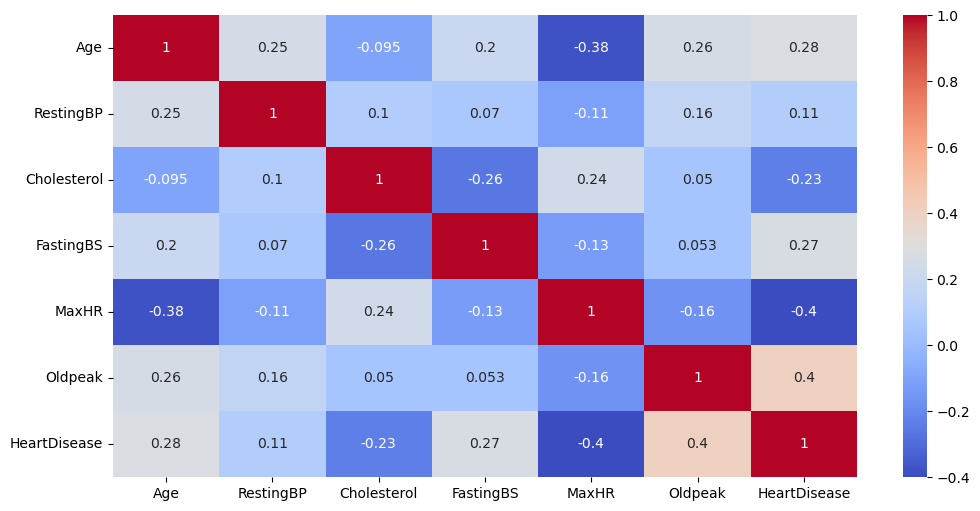

In [32]:
#correlation heatmap to visually identify the relationship between numerical features
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()


# Data Preprocessing

In [33]:
# Since the dataset has no missing values, we can proceed to the next step which is to encode the categorical features
#to confirm
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

-------

***Encoding Technique:***


The encoding technique you choose depends on the nature of the categorical variable:

a. Ordinal Encoding:     
    Use this when the categorical variable has an inherent order or hierarchy. 
    For example:
- Chest Pain Type: Assign numbers based on severity (e.g., Typical Angina = 0, Atypical Angina = 1, Non-Anginal Pain = 2, Asymptomatic = 3).
- Slope of Peak Exercise ST Segment: Assign numbers based on the slope (e.g., Upsloping = 0, Flat = 1, Downsloping = 2).

b. One-Hot Encoding:   
    Create two binary columns. 
    For example: 
- Sex: Male = [1, 0], Female = [0, 1].
- Exercise-Induced Angina: Yes = [1, 0], No = [0, 1].
- Thalassemia: Create separate binary columns for each category (e.g., Normal = [1, 0, 0], Fixed Defect = [0, 1, 0], Reversible Defect = [0, 0, 1]).

c. Label Encoding:   
    Assign 0 and 1. 
    For example:
- Fasting Blood Sugar: > 120 mg/dl = 1, < 120 mg/dl = 0.
- Sex: Male = 0, Female = 1.

In [34]:
#To convert a column of string features to dummy variables
df.select_dtypes(include='object')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,Atypical Angina,Normal,N,Up
1,F,Non-Anginal Pain,Normal,N,Flat
2,M,Atypical Angina,ST,N,Up
3,F,Asymptomatic,Normal,Y,Flat
4,M,Non-Anginal Pain,Normal,N,Up
...,...,...,...,...,...
913,M,Typical Angina,Normal,N,Flat
914,M,Asymptomatic,Normal,N,Flat
915,M,Asymptomatic,Normal,Y,Flat
916,F,Atypical Angina,LVH,N,Flat


In [35]:
# Separate categorical and numerical columns
cate_df = df.select_dtypes(include='object')
num_df = df.select_dtypes(exclude='object')

# One-hot encoding for nominal categorical columns
df_cate_dummy = pd.get_dummies(cate_df, columns=['ChestPainType', 'RestingECG', 'ST_Slope'], drop_first=True)

# Ordinal encoding for ordinal categorical columns
label_encoder = LabelEncoder()
df_cate_dummy['Sex'] = label_encoder.fit_transform(cate_df['Sex'])  # Male: 1, Female: 0
df_cate_dummy['ExerciseAngina'] = label_encoder.fit_transform(cate_df['ExerciseAngina'])  # Yes: 1, No: 0

# Combine encoded categorical columns with numerical columns
df_processed = pd.concat([num_df, df_cate_dummy], axis=1)

# Display the final preprocessed dataset
df_processed.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex,ExerciseAngina,ChestPainType_Atypical Angina,ChestPainType_Non-Anginal Pain,ChestPainType_Typical Angina,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,True,False,False,True,False,False,True
1,49,160,180,0,156,1.0,1,0,0,False,True,False,True,False,True,False
2,37,130,283,0,98,0.0,0,1,0,True,False,False,False,True,False,True
3,48,138,214,0,108,1.5,1,0,1,False,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,1,0,False,True,False,True,False,False,True


In [36]:
# Convert boolean columns to integers
df_processed = df_processed.astype(int)
df_processed.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex,ExerciseAngina,ChestPainType_Atypical Angina,ChestPainType_Non-Anginal Pain,ChestPainType_Typical Angina,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,1,0,1,0,0,1,0,0,1
1,49,160,180,0,156,1,1,0,0,0,1,0,1,0,1,0
2,37,130,283,0,98,0,0,1,0,1,0,0,0,1,0,1
3,48,138,214,0,108,1,1,0,1,0,0,0,1,0,1,0
4,54,150,195,0,122,0,0,1,0,0,1,0,1,0,0,1


--------

# Model Development

In [37]:
X = df_processed.drop('HeartDisease', axis=1)
y = df_processed['HeartDisease']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

#  Feature Scaling: Standardization(StandardScaler) is used to scale the data to have a mean of 0 and a variance of 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Grid Search CV

Its a way of training and validating a model on every possible combination of multiple hyperparameters.
This allows us to find the best combination of hyperparameters that results in the best model.

**ElasticNet:**   
ElasticNet is a regression algorithm that combines L1 and L2 regularization. It is a combination of Lasso and Ridge regression. It is used to find the best performing model adn to reduce overfitting.
*Elastic Net has two main hyperparameters:
- Alpha (λ): The overall strength of the regularization. A higher value means more regularization.
- L1_ratio: The mixing parameter between Lasso and Ridge. A value of 0 corresponds to Ridge, and a value of 1 corresponds to Lasso. Values between 0 and 1 represent a mix of both.

In [38]:
#To find the best hyperparameters for Logistic Regression with ElasticNet and improve your model’s performance

# Define the model
model = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=10000)

# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'l1_ratio': [0, 0.25, 0.5, 0.75, 1]  # Mixing parameter (0 = Ridge, 1 = Lasso)
}


In [39]:
# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=2
)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ................................C=0.001, l1_ratio=0; total time=   0.0s
[CV] END ................................C=0.001, l1_ratio=0; total time=   0.0s
[CV] END ................................C=0.001, l1_ratio=0; total time=   0.0s
[CV] END ................................C=0.001, l1_ratio=0; total time=   0.0s
[CV] END ................................C=0.001, l1_ratio=0; total time=   0.0s
[CV] END .............................C=0.001, l1_ratio=0.25; total time=   0.0s
[CV] END .............................C=0.001, l1_ratio=0.25; total time=   0.0s
[CV] END .............................C=0.001, l1_ratio=0.25; total time=   0.0s
[CV] END .............................C=0.001, l1_ratio=0.25; total time=   0.0s
[CV] END .............................C=0.001, l1_ratio=0.25; total time=   0.0s
[CV] END ..............................C=0.001, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................C=0.001,

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, penalty='elasticnet',
                                          solver='saga'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0, 0.25, 0.5, 0.75, 1]},
             scoring='accuracy', verbose=2)

In [40]:
# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

Best Hyperparameters: {'C': 0.1, 'l1_ratio': 0.25}


In [41]:
#  Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8152173913043478
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78        79
           1       0.84      0.84      0.84       105

    accuracy                           0.82       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.82      0.82      0.82       184

Confusion Matrix:
 [[62 17]
 [17 88]]


--------------
Interpretation:

Precision: High precision means fewer false positives.

Recall: High recall means fewer false negatives.

F1-Score: A high F1-score indicates a good balance between precision and recall.

Accuracy: A higher accuracy indicates better model performance.

-----------------

***ML Model***   
Different machine learning algorithm are used to find algorithm which predict accurately.
- Logistic Regression
- Random Forest 
- Decision Trees
- K-Neighbors Classifier
- Support Vector Classifier
- Navive Bayes 

confussion matrix
[[62 17]
 [17 88]]


Accuracy of Logistic Regression: 81.52173913043478 

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        79
           1       0.84      0.84      0.84       105

    accuracy                           0.82       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.82      0.82      0.82       184



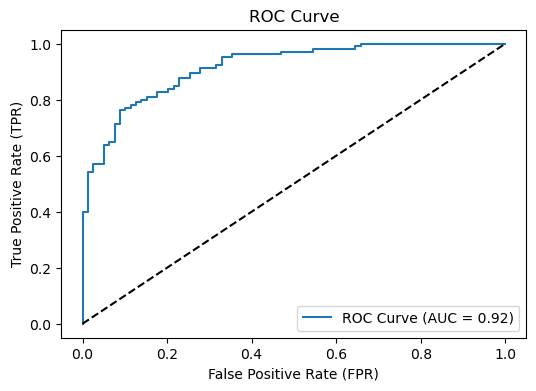

In [42]:
#1.Logistic Regression 

from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_y_pred = log_model.predict(X_test)

log_conf_matrix = confusion_matrix(y_test, log_y_pred)
print("confussion matrix")
print(log_conf_matrix)
print("\n")

log_accuracy_score = accuracy_score(y_test, log_y_pred)
print("Accuracy of Logistic Regression:",log_accuracy_score*100,'\n')
print(classification_report(y_test,log_y_pred))


# ROC Curve
y_pred_proba = log_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [43]:
#2. Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

#3. Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)

#4. K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)

#5. Support Vector Classifier(SVC)
svc_model = SVC(probability=True, random_state=42)
svc_model.fit(X_train, y_train)
svc_y_pred = svc_model.predict(X_test)

#6. Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_y_pred = nb_model.predict(X_test)

# Evaluation of Model Performances

In [44]:
# Function to evaluate models
def evaluate_model(y_true, y_pred, y_pred_proba, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(classification_report(y_true, y_pred))
    print("\n")

In [45]:
# Evaluate all models
models = {
    "Logistic Regression": (log_y_pred, log_model.predict_proba(X_test)[:, 1]),
    "Random Forest": (rf_y_pred, rf_model.predict_proba(X_test)[:, 1]),
    "Decision Tree": (dt_y_pred, dt_model.predict_proba(X_test)[:, 1]),
    "KNN": (knn_y_pred, knn_model.predict_proba(X_test)[:, 1]),
    "SVC": (svc_y_pred, svc_model.predict_proba(X_test)[:, 1]),
    "Naive Bayes": (nb_y_pred, nb_model.predict_proba(X_test)[:, 1])
}

for model_name, (y_pred, y_pred_proba) in models.items():
    evaluate_model(y_test, y_pred, y_pred_proba, model_name)

Model: Logistic Regression
Accuracy: 0.8152
ROC AUC: 0.9163
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        79
           1       0.84      0.84      0.84       105

    accuracy                           0.82       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.82      0.82      0.82       184



Model: Random Forest
Accuracy: 0.8424
ROC AUC: 0.9072
              precision    recall  f1-score   support

           0       0.81      0.82      0.82        79
           1       0.87      0.86      0.86       105

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



Model: Decision Tree
Accuracy: 0.7880
ROC AUC: 0.7861
              precision    recall  f1-score   support

           0       0.74      0.77      0.76        79
           1       0.82      0.80      0.81       105

    accura

# Visualize All Models

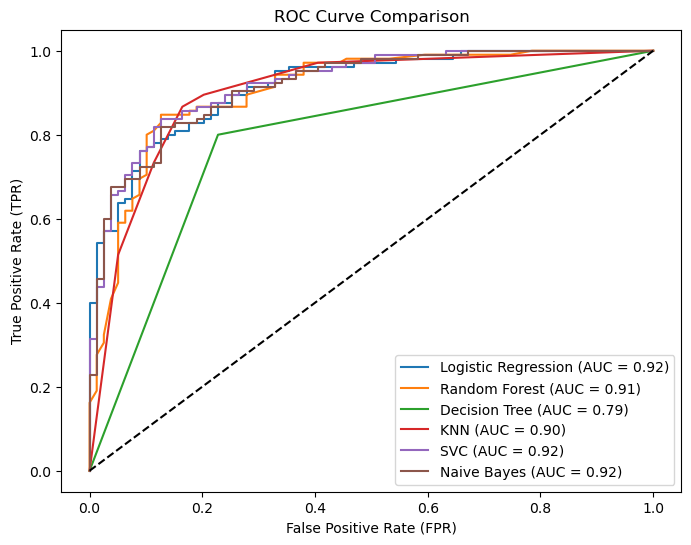

In [46]:
# single plot to compare the ROC curves of all models

plt.figure(figsize=(8, 6))
for model_name, (_, y_pred_proba) in models.items():
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

In [47]:
# Define accuracy scores for each model
lr_acc_score = accuracy_score(y_test, log_y_pred)
nb_acc_score = accuracy_score(y_test, nb_y_pred)
rf_acc_score = accuracy_score(y_test, rf_y_pred)
knn_acc_score = accuracy_score(y_test, knn_y_pred)
dt_acc_score = accuracy_score(y_test, dt_y_pred)
svc_acc_score = accuracy_score(y_test, svc_y_pred)

# Create a DataFrame to compare model accuracies
model_ev = pd.DataFrame({'Model': ['Logistic Regression', 'Naive Bayes', 'Random Forest',
                                   'K-Nearest Neighbour', 'Decision Tree', 'Support Vector Classifier'],
                         'Accuracy': [lr_acc_score*100, nb_acc_score*100, rf_acc_score*100,
                                      knn_acc_score*100, dt_acc_score*100, svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,81.521739
1,Naive Bayes,82.065217
2,Random Forest,84.239130
3,K-Nearest Neighbour,85.326087
4,Decision Tree,78.804348
5,Support Vector Classifier,84.239130


**KNN is the best-performing model for predicting heart disease, with the highest accuracy (0.8533), precision (0.88), recall (0.87), and F1-score (0.87).**

In [48]:
# save the model
import joblib

# Save the trained model
joblib.dump(knn_model, 'heart_disease_model.pkl')

['heart_disease_model.pkl']

# Conclusion

1. **Age Group Most Affected :**  Individuals aged 50-60 are most affected by heart disease, indicating that middle-aged adults are at higher risk.

2. **Most Common Chest Pain:**  The most commonly reported type of chest pain among individuals with heart disease is asymptomatic (ASY), indicating that the absence of symptoms can be a significant indicator of heart disease.

3. **Gender Distribution:**  Heart disease is more prevalent among males.

4. **Cholesterol Levels:**  Individuals with heart disease have higher average cholesterol levels (240 mg/dl) compared to those without heart disease (200 mg/dl), indicating that high cholesterol is a significant risk factor.

5. **Fasting Blood Sugar:**  Individuals with heart disease often exhibit elevated fasting blood sugar levels (FastingBS > 120 mg/dl), highlighting the importance of managing blood sugar levels to reduce heart disease risk.

6. **KNN** is the best-performing model for predicting heart disease, with the highest accuracy (0.8533).
